<a href="https://colab.research.google.com/github/ersozbasak/Machine-Learning-Regression-Models/blob/master/3_KNN_PJM_kMeans_5_largest_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [196]:
import tensorflow as tf
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping
from sklearn import metrics # for the evaluation
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import time
import gc
import sys
#mpl.rcParams['figure.figsize'] = (17, 5)
#mpl.rcParams['axes.grid'] = False
#sns.set_style("whitegrid")
from pandas import DataFrame , concat
from sklearn.metrics import mean_absolute_error , mean_squared_error
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from numpy import mean , concatenate
from math import sqrt
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Activation,Dropout
from numpy import array , hstack
from tensorflow import keras
import tensorflow as tf
import csv

In [197]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [198]:
%cd /content/drive/MyDrive/New_PJM_ML/kMeans
%ls

/content/drive/.shortcut-targets-by-id/1KIngltLQmHhYc3ztZl6sVXvAe_rP7VvU/New_PJM_ML/kMeans
 autokeras/
 clustering_comparison.csv
 dataset_km5_largest.pkl
 dataset_km5_others.pkl
 dataset.pkl
 history_lstm_all_0.708.pkl
 history_lstm_all_0.716.pkl
 history_lstm_all_0.756.pkl
 history_lstm_all_0.796.pkl
 history_lstm_all.pkl
 history_lstm_km5_largest_0.738.pkl
 history_lstm_km5_largest_0.748.pkl
 history_lstm_km5_largest_0.767.pkl
 history_lstm_km5_largest.pkl
 history_lstm_km5_others_0.574.pkl
 history_lstm_km5_others_0.592.pkl
 history_lstm_km5_others.pkl
 kMeans_5_3d_0.png
 kMeans_5_3d_11.png
 kMeans_5_3d_12.png
 kMeans_5_3d_13.png
 kMeans_5_3d_14.png
 kMeans_5_3d_1.png
 kMeans_5_3d_2.png
 kMeans_5_3d_3.png
 kMeans_5_3d_4.png
'kMeans_5_3d_random4_4_4_AEP-DAYTON HUB_CHICAGO HUB.svg'
'kMeans_5_3d_random4_4_4_AEP GEN HUB_ATSI GEN HUB.svg'
'kMeans_5_3d_random4_4_4_AEP GEN HUB_CHICAGO HUB.svg'
'kMeans_5_3d_random4_4_4_ATSI GEN HUB_DOMINION HUB.svg'
'kMeans_5_3d_random4_4_4_DOMINION HUB_N 

In [199]:
import pandas as pd

# Read the CSV file into a DataFrame
largest_cluster_df = pd.read_csv('kMeans_5_largest_cluster.csv')

# Print the DataFrame
largest_cluster_df

,AEP GEN HUB,AEP-DAYTON HUB,ATSI GEN HUB,CHICAGO GEN HUB,CHICAGO HUB,DOMINION HUB,EASTERN HUB,N ILLINOIS HUB,NEW JERSEY HUB,OHIO HUB,...,WESTERN HUB,Timestamp,Day,DayOfWeek,Hour,TimeOfDay,Month,Season,DayType,Cluster
0,66.526689,68.095556,67.318277,65.559705,66.693074,69.495414,69.669366,66.248896,69.168388,68.268067,...,68.755145,2022-01-01 00:00:00,1,6,0,Evening/Night,1,Winter,Weekend,0
1,55.928728,56.996921,56.571705,54.765039,55.588311,58.358574,58.999558,55.258335,58.545221,57.086478,...,58.048027,2022-01-01 02:00:00,1,6,2,Evening/Night,1,Winter,Weekend,0
2,52.131930,53.100233,52.694148,51.074570,51.790448,54.294922,54.701800,51.508351,54.240732,53.176826,...,53.991960,2022-01-01 03:00:00,1,6,3,Evening/Night,1,Winter,Weekend,0
3,51.751316,52.390917,51.786250,49.386083,50.045211,53.740003,53.799772,49.809685,53.344182,52.374108,...,53.275979,2022-01-01 04:00:00,1,6,4,Evening/Night,1,Winter,Weekend,0
4,56.522829,57.678147,56.937008,55.343660,56.123940,58.603205,58.638701,55.833865,58.111905,57.794371,...,58.229928,2022-01-01 05:00:00,1,6,5,Evening/Night,1,Winter,Weekend,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6691,40.385504,41.826911,41.265341,40.868154,41.504461,40.864404,38.182863,41.262732,38.245036,42.140567,...,40.893079,2023-01-01 20:00:00,1,7,20,Evening/Night,1,Winter,Weekend,0
6692,36.484737,37.688131,37.030644,36.783083,37.332459,37.237394,35.006358,37.121669,34.942577,37.917976,...,36.893853,2023-01-01 21:00:00,1,7,21,Evening/Night,1,Winter,Weekend,0
6693,26.041513,26.862939,26.062576,26.412109,26.802300,26.864957,22.804033,26.641553,23.194212,27.018790,...,26.064243,2023-01-01 22:00:00,1,7,22,Evening/Night,1,Winter,Weekend,0
6694,22.436031,23.111215,22.307936,22.598397,22.940277,22.976768,20.179709,22.802370,20.341271,23.241002,...,22.208324,2023-01-01 23:00:00,1,7,23,Evening/Night,1,Winter,Weekend,0


In [200]:
df=largest_cluster_df.iloc[:, :12]
df

,AEP GEN HUB,AEP-DAYTON HUB,ATSI GEN HUB,CHICAGO GEN HUB,CHICAGO HUB,DOMINION HUB,EASTERN HUB,N ILLINOIS HUB,NEW JERSEY HUB,OHIO HUB,WEST INT HUB,WESTERN HUB
0,66.526689,68.095556,67.318277,65.559705,66.693074,69.495414,69.669366,66.248896,69.168388,68.268067,67.783333,68.755145
1,55.928728,56.996921,56.571705,54.765039,55.588311,58.358574,58.999558,55.258335,58.545221,57.086478,57.017916,58.048027
2,52.131930,53.100233,52.694148,51.074570,51.790448,54.294922,54.701800,51.508351,54.240732,53.176826,53.095880,53.991960
3,51.751316,52.390917,51.786250,49.386083,50.045211,53.740003,53.799772,49.809685,53.344182,52.374108,52.381388,53.275979
4,56.522829,57.678147,56.937008,55.343660,56.123940,58.603205,58.638701,55.833865,58.111905,57.794371,57.349907,58.229928
...,...,...,...,...,...,...,...,...,...,...,...,...
6691,40.385504,41.826911,41.265341,40.868154,41.504461,40.864404,38.182863,41.262732,38.245036,42.140567,40.678797,40.893079
6692,36.484737,37.688131,37.030644,36.783083,37.332459,37.237394,35.006358,37.121669,34.942577,37.917976,36.739306,36.893853
6693,26.041513,26.862939,26.062576,26.412109,26.802300,26.864957,22.804033,26.641553,23.194212,27.018790,26.099814,26.064243
6694,22.436031,23.111215,22.307936,22.598397,22.940277,22.976768,20.179709,22.802370,20.341271,23.241002,22.339676,22.208324


In [201]:
class LSTM():
    def __init__(self, lookback, features, forecast):
        self.lookback = lookback
        self.features = features
        self.forecast = forecast


    def df(self, dataframe, lookback, features, forecast):
        df = dataframe.values
        # Create the X and y arrays
        self.X, self.y = [], []
        for i in range(self.lookback, len(df) - self.forecast):
            self.X.append(df[i-self.lookback:i])
            self.y.append(df[i:i+self.forecast, 0]) # USD feature

      # Reshape the X and y arrays
        self.X, self.y = np.array(self.X), np.array(self.y)
        self.X = np.reshape(self.X, (self.X.shape[0], self.X.shape[1], self.features)) # (batch_size, lookback, features)
        self.y = np.reshape(self.y, (self.y.shape[0], self.forecast)) # (batch_size, forecast)

        return self.X, self.y


In [202]:
lstm = LSTM(lookback=11, features=12, forecast=1)

In [203]:
X_all, y_all = lstm.df(dataframe = df, lookback = 11, features = 12, forecast = 1)

In [204]:
#X_all

In [205]:
#y_all

In [206]:
print("X_all shape : {}".format(X_all.shape))
print("y_all shape : {}".format(y_all.shape))


X_all shape : (6684, 11, 12)
y_all shape : (6684, 1)


In [207]:

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.3,random_state=123)

In [208]:
import pickle

# Create a dictionary to store the datasets
dataset = {
    'X_train': X_train,
    'X_test': X_test,
    'y_train': y_train,
    'y_test': y_test
}

# Export the dataset using pickle
with open('dataset_km5_largest.pkl', 'wb') as file:
    pickle.dump(dataset, file)

In [209]:
print(y_all.max())
print(X_all.max())
print(y_all.min())
print(X_all.min())

print(np.mean(y_all))
print(np.mean(X_all))

121.8575
394.952673
0.572412
-126.30799
37.929649457660084
36.48617585792168


In [210]:
print("X_train shape : {}".format(X_train.shape))
print("y_train shape : {}".format(y_train.shape))
print("X_test shape : {}".format(X_test.shape))
print("y_test shape : {}".format(y_test.shape))

X_train shape : (4678, 11, 12)
y_train shape : (4678, 1)
X_test shape : (2006, 11, 12)
y_test shape : (2006, 1)


In [211]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [212]:
def create_model(l_rate, epoch, batchsize, x_train_data, y_train_data):

  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=15,mode='min', restore_best_weights=True)#ceed
  lstm_model = tf.keras.Sequential()
  #lstm_model.add(tf.keras.layers.LSTM(256,activation='relu',input_shape=(lstm.lookback, lstm.features),return_sequences=True))
  #lstm_model.add(tf.keras.layers.LSTM(128,activation='relu',input_shape=(lstm.lookback, lstm.features),return_sequences=True))
  #lstm_model.add(tf.keras.layers.LSTM(64,activation='relu',input_shape=(lstm.lookback, lstm.features),return_sequences=True))
  lstm_model.add(tf.keras.layers.LSTM(64,activation='relu'))
  lstm_model.add(tf.keras.layers.Dense(units=lstm.forecast))

  opt = tf.optimizers.Adam(learning_rate=l_rate)
  lstm_model.compile(
    loss=tf.losses.MeanSquaredError(),
    optimizer=opt,
    metrics=[tf.metrics.MeanAbsoluteError()]
    )

  lstm_history = lstm_model.fit(x_train_data, y_train_data,
    epochs=epoch,
    batch_size = batchsize,
    verbose=1,
    validation_split = 0.2,
    shuffle=False,
    callbacks = [early_stopping]
    )

  return lstm_history, lstm_model


In [213]:
history, model = create_model(l_rate = 0.001, epoch = 300, batchsize = 64, x_train_data = X_train, y_train_data = y_train)

Epoch 1/300
59/59 [==============================] - 4s 26ms/step - loss: 100.3839 - mean_absolute_error: 7.1212 - val_loss: 65.9841 - val_mean_absolute_error: 5.9418
Epoch 2/300
59/59 [==============================] - 1s 12ms/step - loss: 65.8965 - mean_absolute_error: 5.5986 - val_loss: 59.0268 - val_mean_absolute_error: 5.4628
Epoch 3/300
59/59 [==============================] - 1s 11ms/step - loss: 61.2530 - mean_absolute_error: 5.3992 - val_loss: 57.3214 - val_mean_absolute_error: 5.4536
Epoch 4/300
59/59 [==============================] - 1s 11ms/step - loss: 60.5470 - mean_absolute_error: 5.3672 - val_loss: 56.2514 - val_mean_absolute_error: 5.3825
Epoch 5/300
59/59 [==============================] - 1s 12ms/step - loss: 58.8363 - mean_absolute_error: 5.2915 - val_loss: 54.1755 - val_mean_absolute_error: 5.3584
Epoch 6/300
59/59 [==============================] - 1s 12ms/step - loss: 58.7077 - mean_absolute_error: 5.2668 - val_loss: 55.1837 - val_mean_absolute_error: 5.3939
Epo

In [214]:
def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss', linewidth=1,color='green')
    plt.plot(epochs, val_loss, 'r', label='Validation loss', linewidth=1,color='purple')
    plt.title(title)
    plt.legend()

    plt.show()

In [215]:
import pickle

# Save history to a file
with open('history_lstm_km5_largest.pkl', 'wb') as file:
    pickle.dump(history, file)

with open('model_lstm_km5_largest.pkl', 'wb') as file:
    pickle.dump(model, file)

In [216]:
import pickle

# Load history from file
with open('history_lstm_km5_largest.pkl', 'rb') as file:
    history = pickle.load(file)

with open('model_lstm_km5_largest.pkl', 'rb') as file:
    model = pickle.load(file)

<ipython-input-214-6b1627954cc9>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'b', label='Training loss', linewidth=1,color='green')
<ipython-input-214-6b1627954cc9>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, 'r', label='Validation loss', linewidth=1,color='purple')


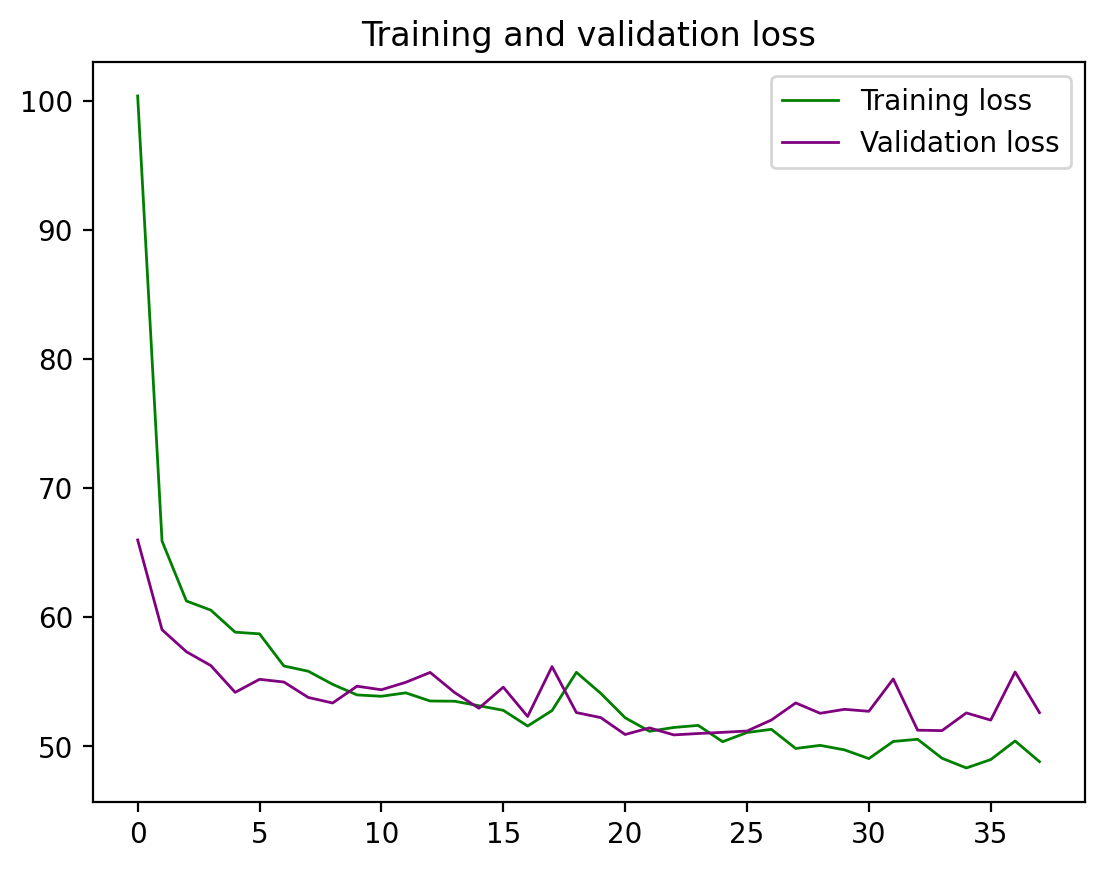

In [217]:
plot_train_history(history,
                   'Training and validation loss')

In [239]:
def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Eğitim kayıpları', linewidth=1,color='green')
    plt.plot(epochs, val_loss, 'r', label='Doğrulama kayıpları', linewidth=1,color='purple')
    plt.title(title)
    plt.legend()

    plt.show()

<ipython-input-239-0bab22136887>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'b', label='Eğitim kayıpları', linewidth=1,color='green')
<ipython-input-239-0bab22136887>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, 'r', label='Doğrulama kayıpları', linewidth=1,color='purple')


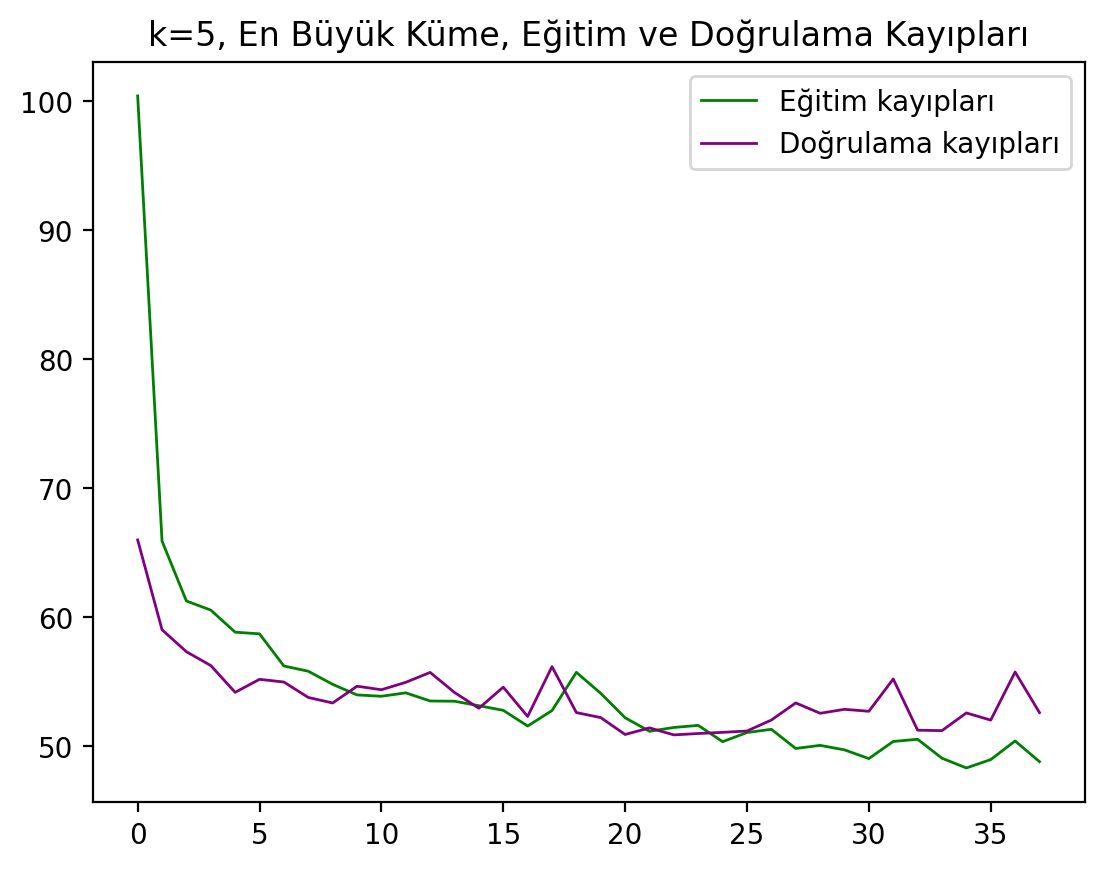

In [241]:
plot_train_history(history,
                   'k=5, En Büyük Küme, Eğitim ve Doğrulama Kayıpları')

In [218]:
# Make predictions
y_pred = model.predict(X_test)

63/63 [==============================] - 0s 3ms/step


In [219]:
#y_pred

In [220]:
#y_test

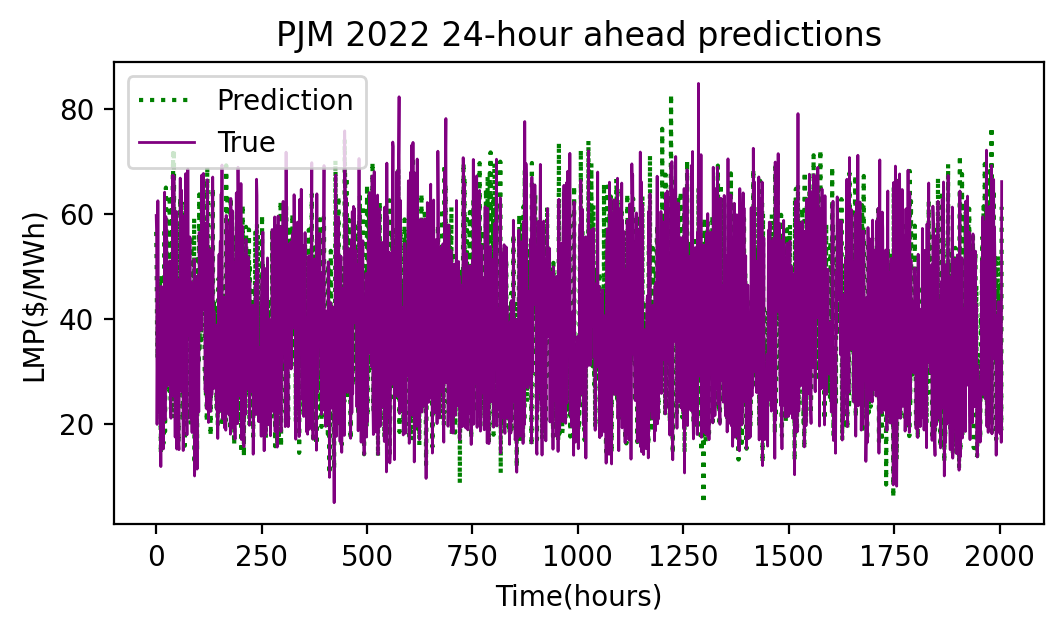

In [230]:
plt.figure(figsize=(6,3))


plt.xlabel('Time(hours)')
plt.ylabel('LMP($/MWh)')
plt.title("PJM 2022 24-hour ahead predictions")

hour= 24
n_day = 365
plot_day = hour*n_day

plt.plot(y_pred[:,-1], label='Prediction', linestyle='dotted',color='green')
plt.plot(y_test[:, -1], label='True', linewidth=1,color='purple')
plt.legend()
plt.show()

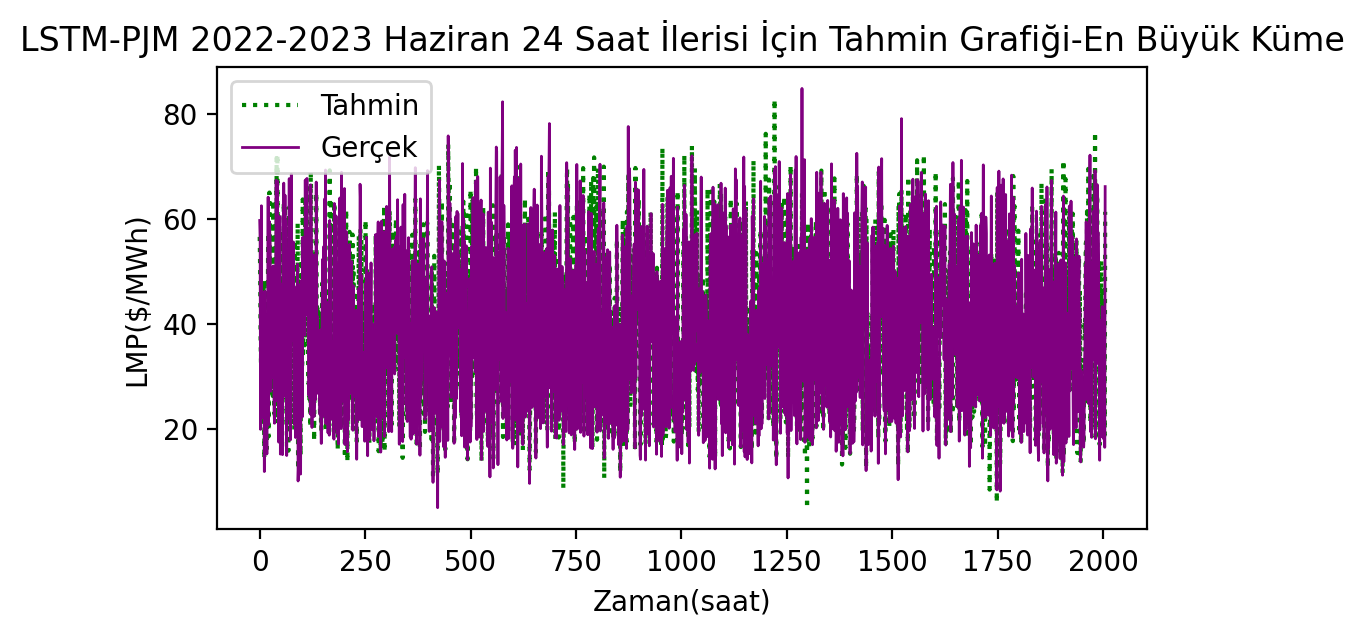

In [247]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,3))
# Reshape the y_pred and y_test arrays to have shape (batch_size,)
y_pred_resized = y_pred[:,-1]
y_test_resized = y_test[:,-1]
plt.xlabel('Zaman(saat)')
plt.ylabel('LMP($/MWh)')
plt.title("LSTM-PJM 2022-2023 Haziran 24 Saat İlerisi İçin Tahmin Grafiği-En Büyük Küme")

hour= 24
n_day = 365
plot_day = hour*n_day

plt.plot(y_pred_resized[0:plot_day], label='Tahmin', linestyle='dotted',color='green')
plt.plot(y_test_resized[0:plot_day], label='Gerçek', linewidth=1,color='purple')

plt.legend()
plt.show()

In [232]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
errors = y_pred- y_test
mse = np.square(errors).mean()
rmse = np.sqrt(mse)
mae = np.abs(errors).mean()

print('Mean Absolute Error: {:.2f}'.format(mae))
print('Root Mean Square Error: {:.2f}'.format(rmse))
print('R2 Score: ', r2_score(y_test, y_pred))


Mean Absolute Error: 5.15
Root Mean Square Error: 7.38
R2 Score:  0.7727698433534015


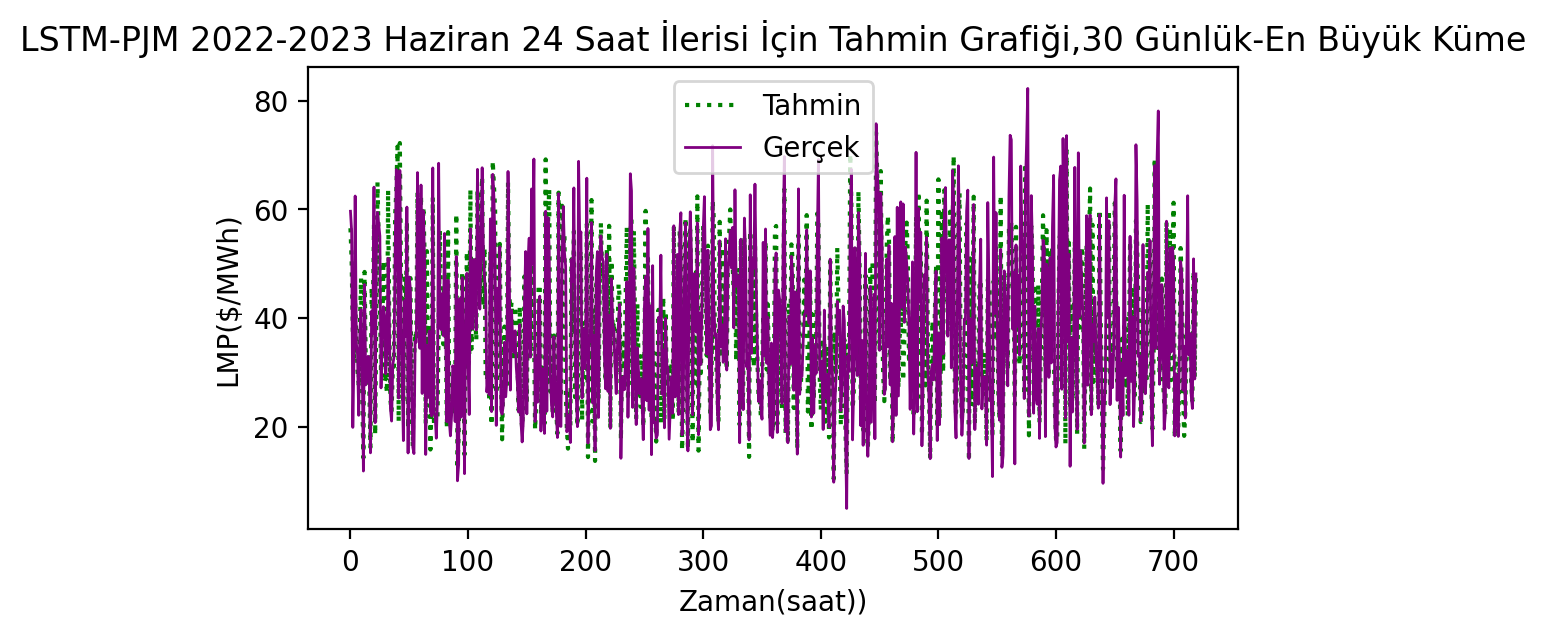

In [244]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,3))
# Reshape the y_pred and y_test arrays to have shape (batch_size,)
y_pred_resized = y_pred[:,-1]
y_test_resized = y_test[:,-1]
plt.xlabel('Zaman(saat))')
plt.ylabel('LMP($/MWh)')
plt.title("LSTM-PJM 2022-2023 Haziran 24 Saat İlerisi İçin Tahmin Grafiği,30 Günlük-En Büyük Küme")

hour= 24
n_day = 30
plot_day = hour*n_day

plt.plot(y_pred_resized[0:plot_day], label='Tahmin', linestyle='dotted',color='green')
plt.plot(y_test_resized[0:plot_day], label='Gerçek', linewidth=1,color='purple')

plt.legend()
plt.show()

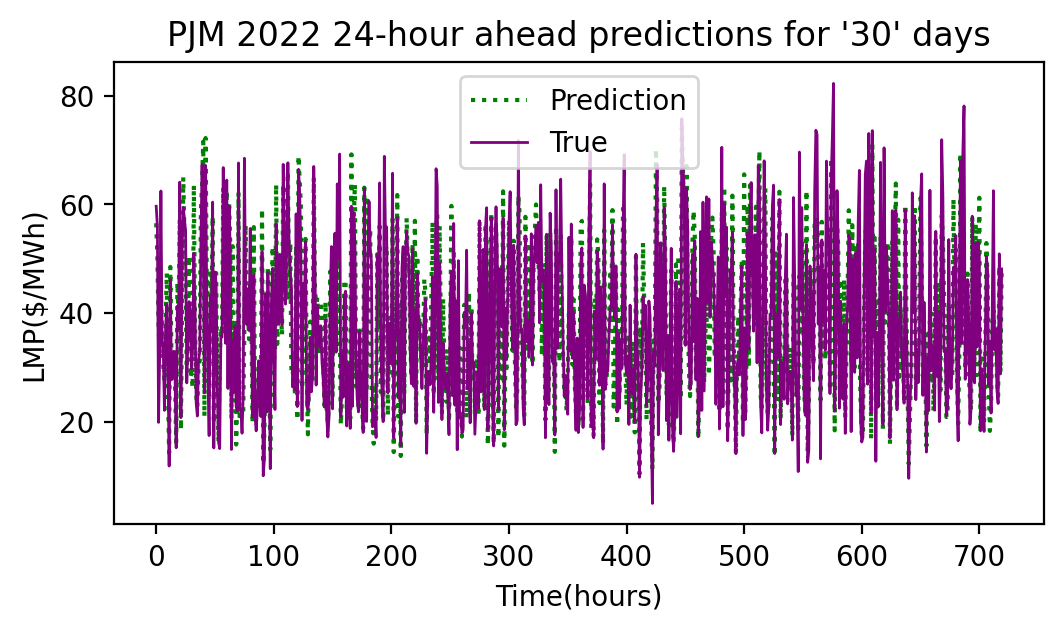

In [234]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,3))
# Reshape the y_pred and y_test arrays to have shape (batch_size,)
y_pred_resized = y_pred[:,-1]
y_test_resized = y_test[:,-1]
plt.xlabel('Time(hours)')
plt.ylabel('LMP($/MWh)')
plt.title("PJM 2022 24-hour ahead predictions for '30' days")

hour= 24
n_day = 30
plot_day = hour*n_day

plt.plot(y_pred_resized[0:plot_day], label='Prediction', linestyle='dotted',color='green')
plt.plot(y_test_resized[0:plot_day], label='True', linewidth=1,color='purple')

plt.legend()
plt.show()

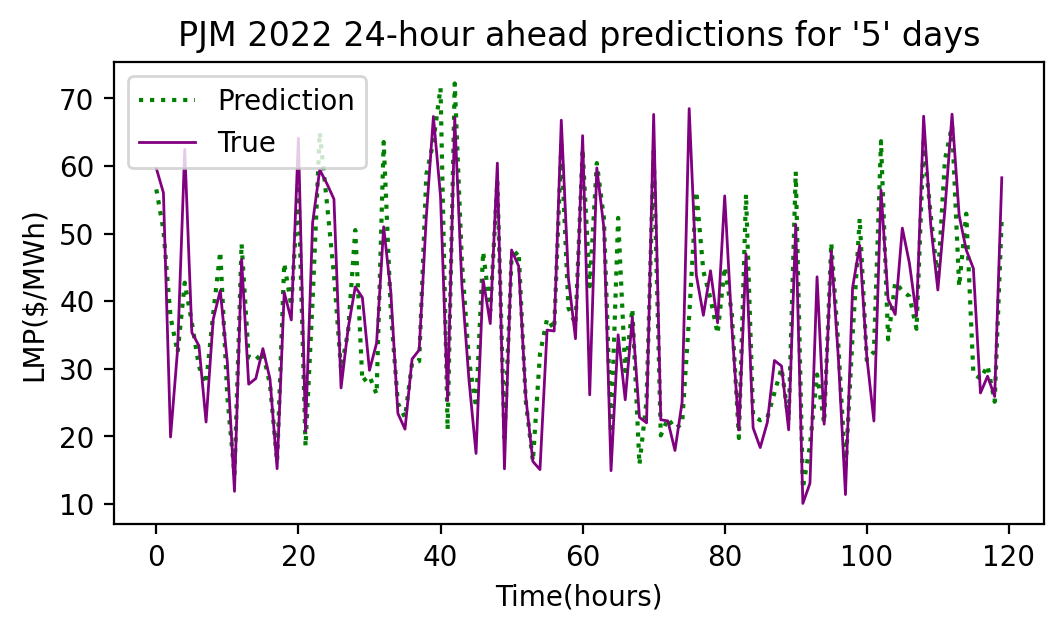

In [235]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,3))
# Reshape the y_pred and y_test arrays to have shape (batch_size,)
y_pred_resized = y_pred[:,-1]
y_test_resized = y_test[:,-1]
plt.xlabel('Time(hours)')
plt.ylabel('LMP($/MWh)')
plt.title("PJM 2022 24-hour ahead predictions for '5' days")

hour= 24
n_day = 5
plot_day = hour*n_day

plt.plot(y_pred_resized[0:plot_day], label='Prediction', linestyle='dotted',color='green')
plt.plot(y_test_resized[0:plot_day], label='True', linewidth=1,color='purple')

plt.legend()
plt.show()

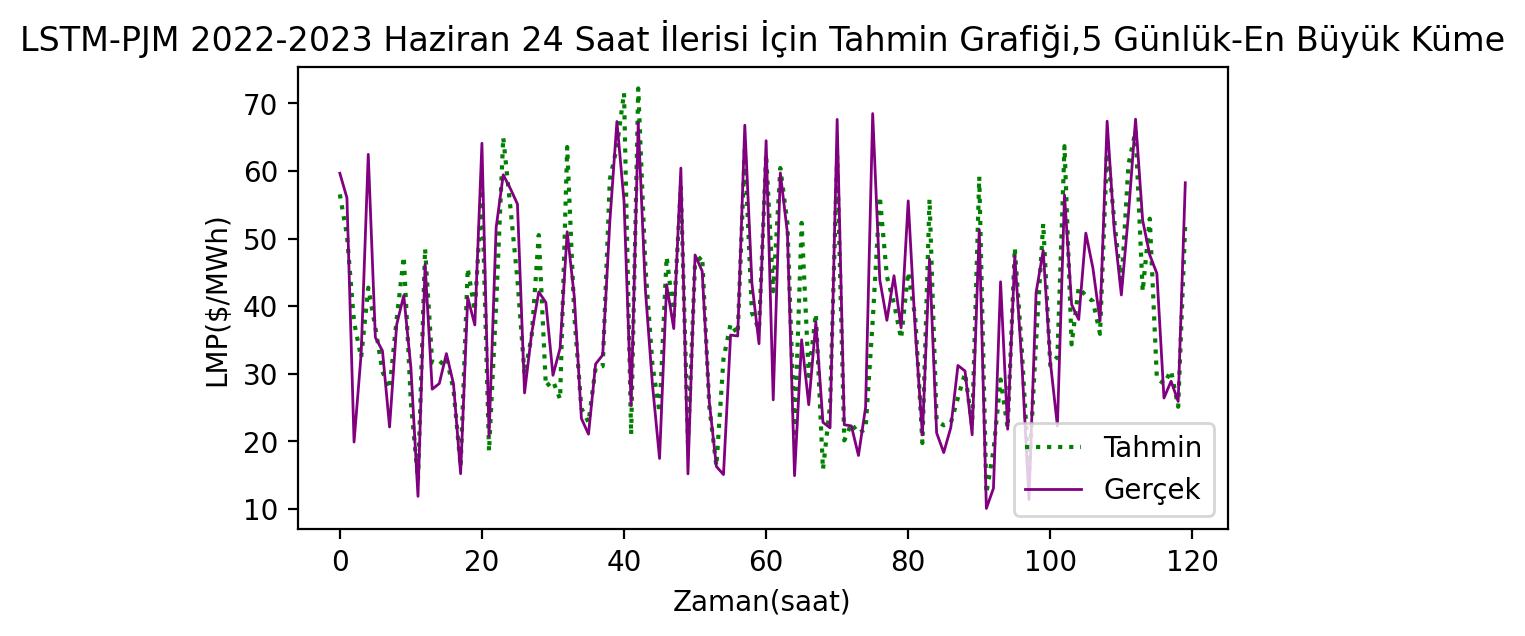

In [245]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,3))
# Reshape the y_pred and y_test arrays to have shape (batch_size,)
y_pred_resized = y_pred[:,-1]
y_test_resized = y_test[:,-1]
plt.xlabel('Zaman(saat)')
plt.ylabel('LMP($/MWh)')
plt.title("LSTM-PJM 2022-2023 Haziran 24 Saat İlerisi İçin Tahmin Grafiği,5 Günlük-En Büyük Küme")

hour= 24
n_day = 5
plot_day = hour*n_day

plt.plot(y_pred_resized[0:plot_day], label='Tahmin', linestyle='dotted',color='green')
plt.plot(y_test_resized[0:plot_day], label='Gerçek', linewidth=1,color='purple')

plt.legend()
plt.show()

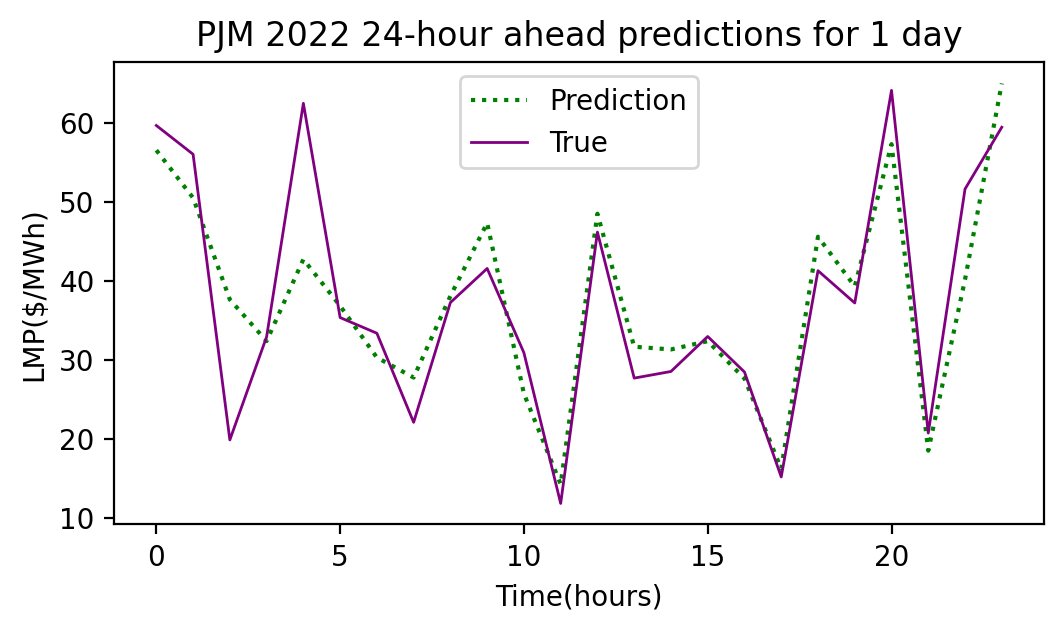

In [237]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,3))
# Reshape the y_pred and y_test arrays to have shape (batch_size,)
y_pred_resized = y_pred[:,-1]
y_test_resized = y_test[:,-1]
plt.xlabel('Time(hours)')
plt.ylabel('LMP($/MWh)')
plt.title("PJM 2022 24-hour ahead predictions for 1 day")

hour= 24
n_day = 1
plot_day = hour*n_day

plt.plot(y_pred_resized[0:plot_day], label='Prediction', linestyle='dotted',color='green')
plt.plot(y_test_resized[0:plot_day], label='True', linewidth=1,color='purple')

plt.legend()
plt.show()

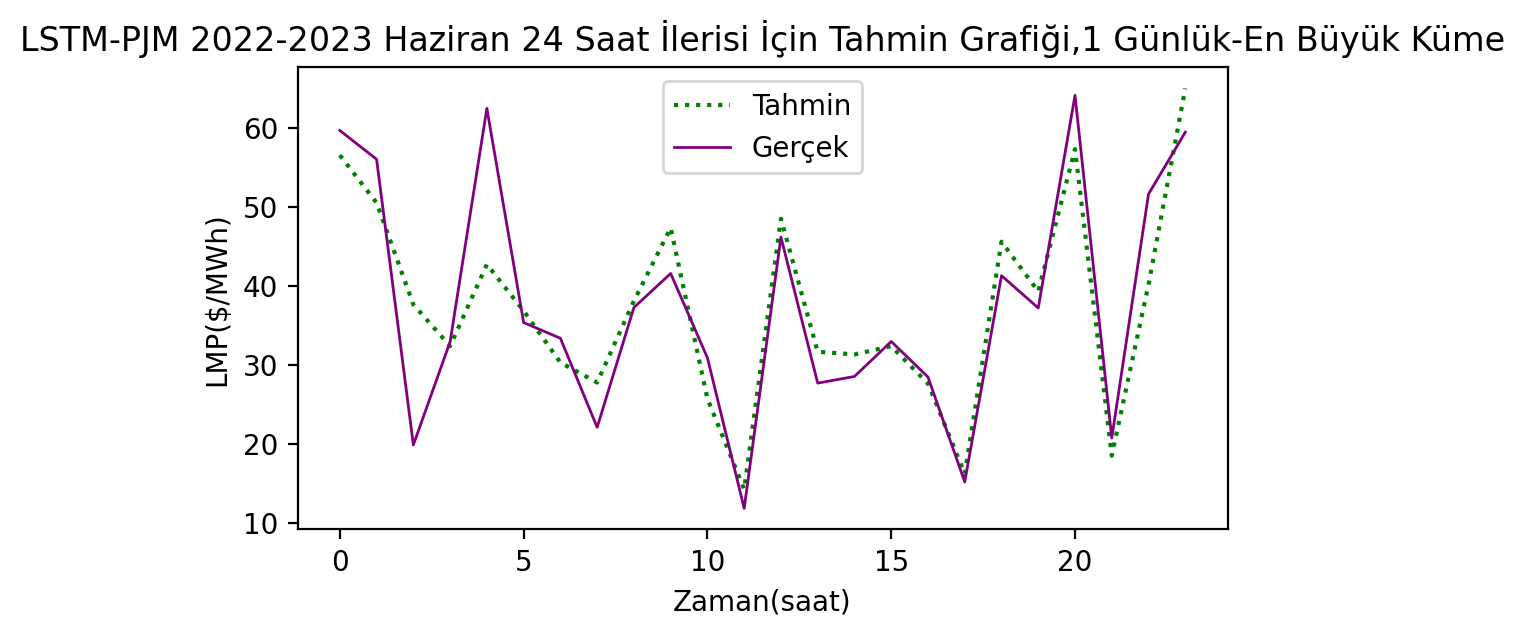

In [246]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,3))
# Reshape the y_pred and y_test arrays to have shape (batch_size,)
y_pred_resized = y_pred[:,-1]
y_test_resized = y_test[:,-1]
plt.xlabel('Zaman(saat)')
plt.ylabel('LMP($/MWh)')
plt.title("LSTM-PJM 2022-2023 Haziran 24 Saat İlerisi İçin Tahmin Grafiği,1 Günlük-En Büyük Küme")

hour= 24
n_day = 1
plot_day = hour*n_day

plt.plot(y_pred_resized[0:plot_day], label='Tahmin', linestyle='dotted',color='green')
plt.plot(y_test_resized[0:plot_day], label='Gerçek', linewidth=1,color='purple')

plt.legend()
plt.show()